In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV, RANSACRegressor, HuberRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error

Só vamos usar nesse notebook os dados escalonados

In [2]:
df = pd.read_csv('./melting-point/train_scaled.csv')

In [3]:
melting_point={}
melting_point["data"] = df.drop(['Tm'], axis=1).values
melting_point["target"] = df["Tm"].values

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(melting_point["data"], melting_point["target"], test_size=0.1)

# Regressor Linear

In [5]:
lr = LinearRegression()

lr.fit(X_train, Y_train)
pred = lr.predict(X_test)

print("R2 score:", lr.score(X_test, Y_test))
print("Mean Absolute error:", mean_absolute_error(Y_test, pred))

R2 score: 0.6088828424982877
Mean Absolute error: 36.440926820936646


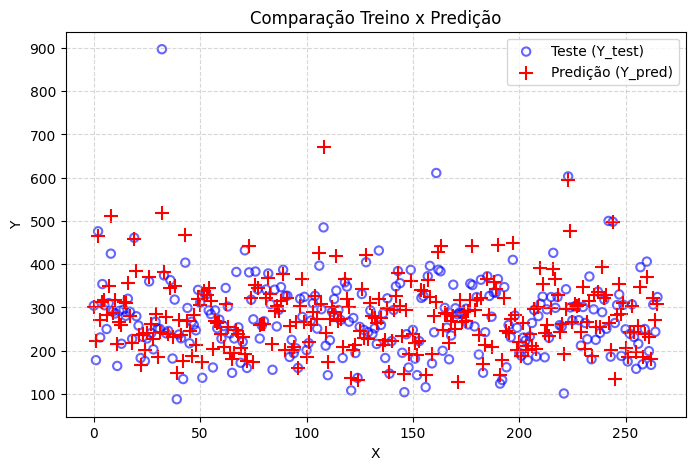

In [6]:
plt.figure(figsize=(8, 5))
x_range = np.arange(0, len(X_test), 1)
plt.scatter(x_range, Y_test, color='blue', alpha=0.6, label='Teste (Y_test)', facecolors='none', edgecolors='blue', linewidths=1.5)
plt.scatter(x_range, pred, color='red', marker='+', label='Predição (Y_pred)', s=100)

plt.title("Comparação Treino x Predição")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [7]:
lr_scores = cross_val_score(lr, melting_point["data"], melting_point["target"], cv=10, scoring='neg_mean_absolute_error')
print(lr_scores)
print(lr_scores.mean())
print(lr_scores.std())

[-38.52529129 -36.39924098 -38.52384631 -34.96310041 -38.64937435
 -38.87804474 -38.06550993 -37.16309176 -38.64136337 -34.85893073]
-37.46677938539316
1.4719820636831384


# Ridge Regression

In [7]:
rg = RidgeCV(alphas=(1000.0, 100.0, 50.0, 10.0, 5.0, 4.0, 3.0, 2.0, 1.0, 0.1, 0.01, 0.05, 0.005, 0.0025, 0.001, 0.00025), cv=10)

rg.fit(X_train, Y_train)
pred = rg.predict(X_test)

print(rg.alpha_)
print("R2 score:", rg.score(X_test, Y_test))
print("Mean Absolute error:", mean_absolute_error(Y_test, pred))

100.0
R2 score: 0.6259307701315737
Mean Absolute error: 36.772164094051384


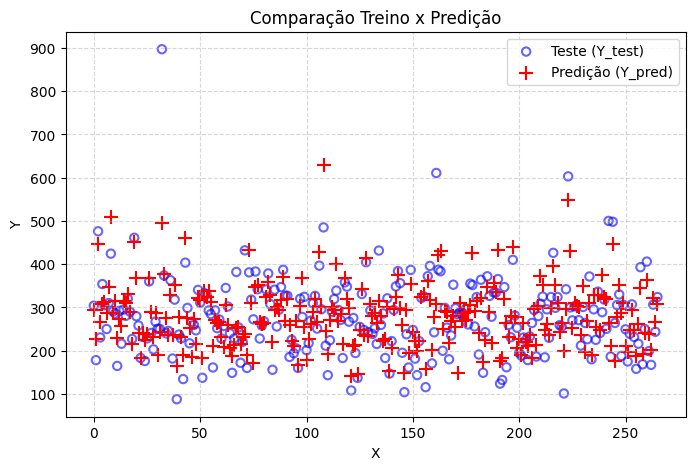

In [8]:
plt.figure(figsize=(8, 5))
x_range = np.arange(0, len(X_test), 1)
plt.scatter(x_range, Y_test, color='blue', alpha=0.6, label='Teste (Y_test)', facecolors='none', edgecolors='blue', linewidths=1.5)
plt.scatter(x_range, pred, color='red', marker='+', label='Predição (Y_pred)', s=100)

plt.title("Comparação Treino x Predição")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [10]:
rg_scores = cross_val_score(rg, melting_point['data'], melting_point['target'], cv=10, scoring="neg_mean_absolute_error")
print(rg_scores)
print(rg_scores.mean())
print(rg_scores.std())

[-39.07994924 -36.9710957  -38.439493   -34.62990191 -37.85156718
 -38.40704975 -39.06710646 -37.43117512 -38.67093626 -33.92344789]
-37.44717225141152
1.7157475553736714


# Lasso Regression

In [9]:
ls = LassoCV(alphas=(1000.0, 100.0, 50.0, 10.0, 5.0, 4.0, 3.0, 2.0, 1.0, 0.1, 0.01, 0.005, 0.0025, 0.001, 0.00025), cv=10, max_iter=10000)

ls.fit(X_train, Y_train)
pred = ls.predict(X_test)

print(ls.alpha_)
print("R2 score:", ls.score(X_test, Y_test))
print("Mean Absolute error:", mean_absolute_error(Y_test, pred))

0.1
R2 score: 0.6204602956898626
Mean Absolute error: 36.73066281143417


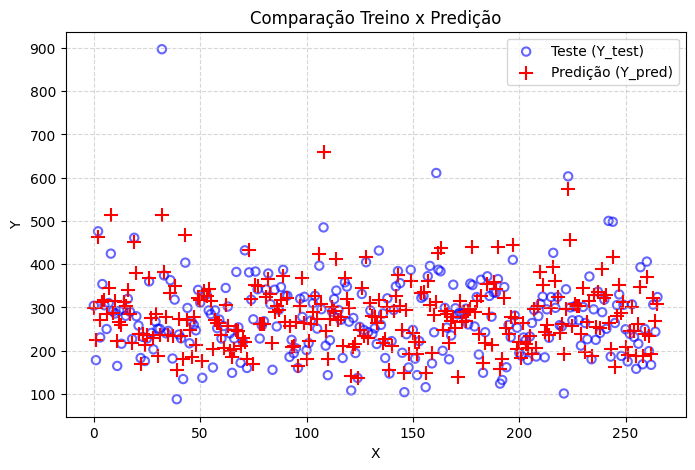

In [10]:
plt.figure(figsize=(8, 5))
x_range = np.arange(0, len(X_test), 1)
plt.scatter(x_range, Y_test, color='blue', alpha=0.6, label='Teste (Y_test)', facecolors='none', edgecolors='blue', linewidths=1.5)
plt.scatter(x_range, pred, color='red', marker='+', label='Predição (Y_pred)', s=100)

plt.title("Comparação Treino x Predição")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [13]:
ls_scores = cross_val_score(ls, melting_point['data'], melting_point['target'], cv=10, scoring='neg_mean_absolute_error')
print(ls_scores)
print(ls_scores.mean())
print(ls_scores.std())

[-38.19520191 -36.2989122  -38.29972193 -34.47940868 -38.0700577
 -38.38284355 -38.39907357 -37.12113236 -38.5298131  -34.17210257]
-37.1948267562573
1.579550771338198


# Elastic Net

In [11]:
encv = ElasticNetCV(alphas=(1000.0, 100.0, 50.0, 10.0, 5.0, 4.0, 3.0, 2.0, 1.0, 0.1, 0.01, 0.005, 0.0025, 0.001, 0.00025), l1_ratio=(0.1, 0.25, 0.5, 0.75, 0.8, 0.9, 1),cv=10, max_iter=10000)

encv.fit(X_train, Y_train)
pred = encv.predict(X_test)

print(encv.alpha_)
print(encv.l1_ratio_)
print("R2 score:", encv.score(X_test, Y_test))
print("Mean Absolute error:", mean_absolute_error(Y_test, pred))

D:\puc\ml\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.538e+03, tolerance: 1.564e+03
  model = cd_fast.enet_coordinate_descent_gram(
D:\puc\ml\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.873e+03, tolerance: 1.492e+03
  model = cd_fast.enet_coordinate_descent_gram(
D:\puc\ml\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.975e+03, tolerance: 1.564e+03
  model

0.1
0.75
R2 score: 0.6251006933940411
Mean Absolute error: 36.837510227886895


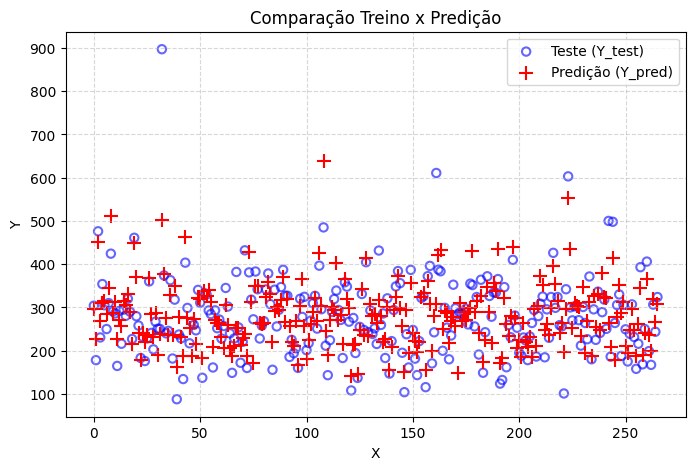

In [12]:
plt.figure(figsize=(8, 5))
x_range = np.arange(0, len(X_test), 1)
plt.scatter(x_range, Y_test, color='blue', alpha=0.6, label='Teste (Y_test)', facecolors='none', edgecolors='blue', linewidths=1.5)
plt.scatter(x_range, pred, color='red', marker='+', label='Predição (Y_pred)', s=100)

plt.title("Comparação Treino x Predição")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [23]:
encv_scores = cross_val_score(encv, melting_point['data'], melting_point['target'], cv=10, scoring='neg_mean_absolute_error')
print(encv_scores)
print(encv_scores.mean())
print(encv_scores.std())

D:\puc\ml\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.601e+03, tolerance: 1.537e+03
  model = cd_fast.enet_coordinate_descent_gram(
D:\puc\ml\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.645e+03, tolerance: 1.560e+03
  model = cd_fast.enet_coordinate_descent_gram(
D:\puc\ml\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.773e+03, tolerance: 1.570e+03
  model

[-38.87109322 -36.76822141 -38.29303719 -34.41231267 -37.77460253
 -38.18944771 -38.87175645 -37.68329139 -38.56905523 -33.88329307]
-37.33161108768913
1.7024709566381693


# RANSAC

In [13]:
rs = RANSACRegressor()

rs.fit(X_train, Y_train)
pred = rs.predict(X_test)

print("R2 score:", rs.score(X_test, Y_test))
print("Mean Absolute error:", mean_absolute_error(Y_test, pred))

R2 score: 0.4730777963153303
Mean Absolute error: 40.453111756401654


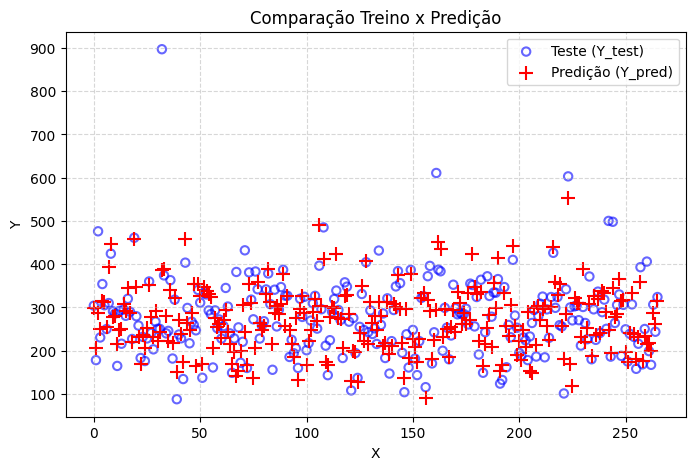

In [14]:
plt.figure(figsize=(8, 5))
x_range = np.arange(0, len(X_test), 1)
plt.scatter(x_range, Y_test, color='blue', alpha=0.6, label='Teste (Y_test)', facecolors='none', edgecolors='blue', linewidths=1.5)
plt.scatter(x_range, pred, color='red', marker='+', label='Predição (Y_pred)', s=100)

plt.title("Comparação Treino x Predição")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [18]:
rs_scores = cross_val_score(rs, melting_point['data'], melting_point['target'], cv=10, scoring='neg_mean_absolute_error')
print(rs_scores)
print(rs_scores.mean())
print(rs_scores.std())

[-46.9788748  -41.75573321 -47.65393016 -43.39056634 -53.03059641
 -42.73506971 -48.61350085 -44.84957065 -44.62962368 -40.92941203]
-45.456687784227675
3.4841995857469983


# Huber Regression

In [15]:
hr = HuberRegressor(epsilon=2.0, max_iter=1000)

hr.fit(X_train, Y_train)
pred = hr.predict(X_test)

print("R2 score:", hr.score(X_test, Y_test))
print("Mean Absolute error:", mean_absolute_error(Y_test, pred))

R2 score: 0.39741646601155034
Mean Absolute error: 39.97983869834819


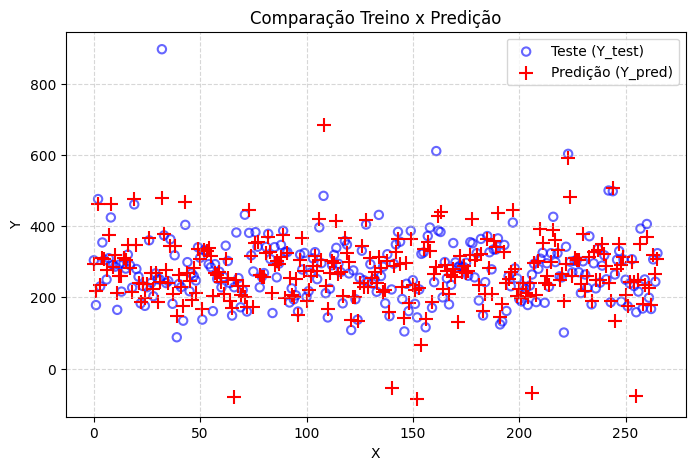

In [16]:
plt.figure(figsize=(8, 5))
x_range = np.arange(0, len(X_test), 1)
plt.scatter(x_range, Y_test, color='blue', alpha=0.6, label='Teste (Y_test)', facecolors='none', edgecolors='blue', linewidths=1.5)
plt.scatter(x_range, pred, color='red', marker='+', label='Predição (Y_pred)', s=100)

plt.title("Comparação Treino x Predição")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [21]:
hr_scores = cross_val_score(hr, melting_point['data'], melting_point['target'], cv=10, scoring='neg_mean_absolute_error')
print(hr_scores)
print(hr_scores.mean())
print(hr_scores.std())

[-41.78862026 -43.5832977  -42.09975573 -38.11961418 -42.19497316
 -42.40985452 -49.51246312 -42.53519086 -40.50153502 -40.30246138]
-42.30477659306622
2.806181246375621


# Leaderboard

In [24]:
modelos = {
    "Regressor Linear": lr_scores,
    "Ridge": rg_scores,
    "Lasso": ls_scores,
    "ElasticNet": encv_scores,
    "RANSAC": rs_scores,
    "Huber": hr_scores
}

In [25]:
resultados = []
for nome, score in modelos.items():
    resultados.append({
        "Modelo": nome,
        "Média do Score": score.mean(),
        "Desvio Padrão": score.std()
    })

leaderboard = pd.DataFrame(resultados).sort_values(by="Média do Score", ascending=False)
leaderboard.reset_index(drop=True, inplace=True)

display(leaderboard.style.background_gradient(cmap="Greens").format({"Média do Score": "{:.4f}", "Desvio Padrão": "{:.4f}"}))

,Modelo,Média do Score,Desvio Padrão
0,Lasso,-37.1948,1.5796
1,ElasticNet,-37.3316,1.7025
2,Ridge,-37.4472,1.7157
3,Regressor Linear,-37.4668,1.4720
4,Huber,-42.3048,2.8062
5,RANSAC,-45.4567,3.4842
